In [1]:
import geopandas as gpd

# 1.读取数据：

In [2]:
import fiona
help(fiona.open)

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, allow_unsupported_drivers=False, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longla

### 查看fiona默认的驱动程序

In [3]:
import fiona
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

## 加载shapefile文件：

In [4]:
china_gdf = gpd.read_file("./datasets/china/china_provinces.shp")
china_gdf.head()

,OBJECTID,省域代,Shape_Leng,Shape_Area,geometry
0,1,11,10.115308,1.734812,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,2,12,12.341771,1.231230,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,3,13,57.093011,19.725624,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
3,4,14,27.203120,15.993148,"POLYGON ((114.13714 40.73445, 114.13860 40.732..."
4,5,15,149.939859,129.126641,"MULTIPOLYGON (((124.48740 40.15550, 124.48747 ..."


<AxesSubplot:>

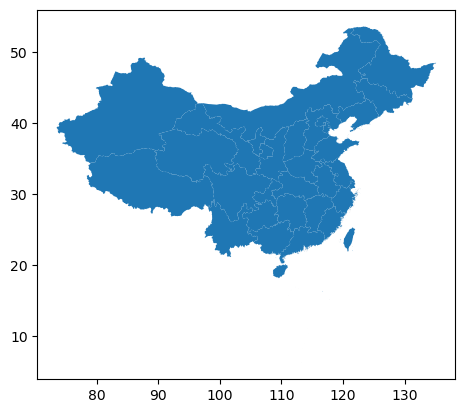

In [5]:
china_gdf.plot()

## 加载geojson格式数据：

In [6]:
china_gdf = gpd.read_file('./datasets/china.geojson')

In [7]:
china_gdf.head()

,OBJECTID,省域代,Shape_Leng,Shape_Area,geometry
0,1,11,10.115308,1.734812,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,2,12,12.341771,1.231230,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,3,13,57.093011,19.725624,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
3,4,14,27.203120,15.993148,"POLYGON ((114.13714 40.73445, 114.13860 40.732..."
4,5,15,149.939859,129.126641,"MULTIPOLYGON (((124.48740 40.15550, 124.48747 ..."


## 加载文件地理数据库中的数据：

In [8]:
# 文件地理数据库中包含两个文件：china_national + china_provinces
# 使用 layer 关键字从多层文件中选择一个图层读取文件地理数据库中指定文件
china_national = gpd.read_file('./datasets/china.gdb' , layer = "china_national")
china_national

,OBJECTID,AREA,PERIMETER,国界_,国界_ID,NAME,Shape_Leng,Shape_Length,Shape_Area,geometry
0,1,0.001184,0.168217,2,507,中华人民共和国,462.764697,462.764697,961.831319,"MULTIPOLYGON (((113.23390 6.31909, 113.23230 6..."


<AxesSubplot:>

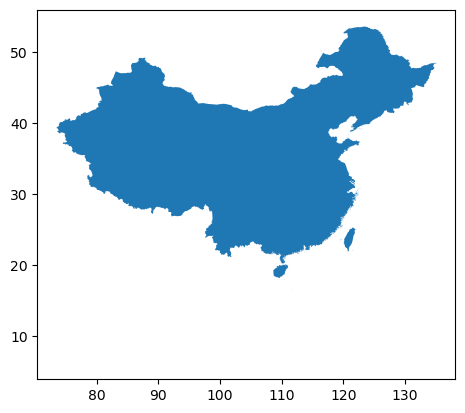

In [9]:
china_national.plot()

<AxesSubplot:>

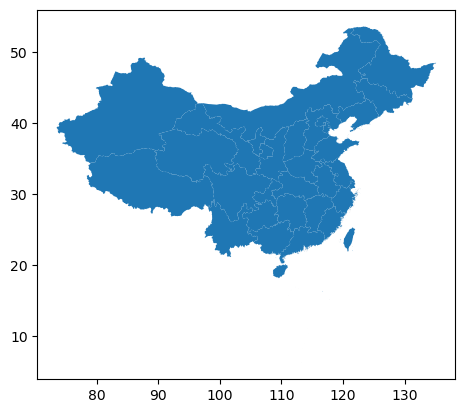

In [10]:
china_provinces = gpd.read_file('./datasets/china.gdb' , layer = "china_provinces")
china_provinces.plot()

##  加载 web URL 资源：

In [11]:
# 例如来自 geojson.xyz 的 GeoJSON 文件
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
gdf = gpd.read_file(url)
gdf

,scalerank,featureclass,geometry
0,1,Country,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,1,Country,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,1,Country,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,1,Country,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,1,Country,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,1,Country,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,1,Country,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,1,Country,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,1,Country,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


<AxesSubplot:>

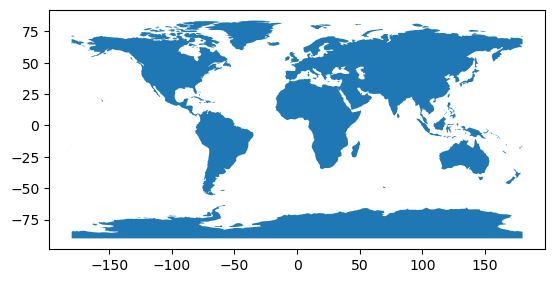

In [12]:
gdf.plot()

## 加载包含数据的 ZIP 文件：

In [13]:
zipfile = "./datasets/nybb_16a.zip"
nybb = gpd.read_file(zipfile)
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<AxesSubplot:>

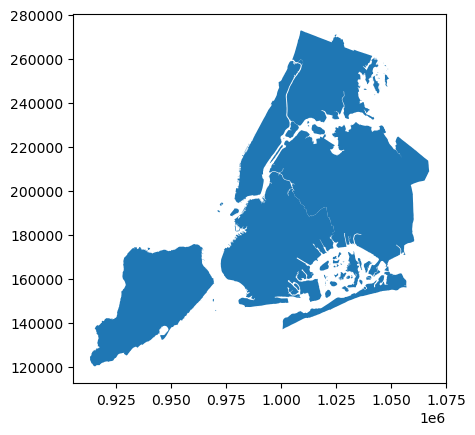

In [14]:
nybb.plot()

# 2.写出数据：

## 写出为Shapefile文件:

In [15]:
china_gdf.to_file("./out/china.shp",encoding="utf-8")

## 写出为GeoJSON文件:

In [16]:
china_gdf.to_file("./out/china.geojson", driver='GeoJSON')

## 写出为GeoPackage文件:

In [17]:
china_national.to_file("./out/package.gpkg", layer='china_national', driver="GPKG")
china_provinces.to_file("./out/package.gpkg", layer='china_provinces', driver="GPKG")